# Signal Processing

Временные ряды можно рассматривать как подмножество сигналов, а извлечение признаков из временных рядов можно осуществлять при помощи тех же методов, которые используются в теории сигналов. 

Если в сигнале есть посторяющийся паттерн, то можно говорить о его *периодичности*

- **P** - период, время, после которого паттерн сигнала повторяется
- $\lambda$ - длина волны, расстояние между повторами 

- **f** - частота, обратная от периода, измеряется в Герцах (Hz) 

$$ f = \frac{1}{P} = \frac{s}{\lambda},$$

где s - скорость звука 

## Преобразование Фурье

Лучшее объяснение - https://www.youtube.com/watch?v=spUNpyF58BY

А если вкратце - по сложному сигналу мы можем понять, из каких составных "частей" он состоит, т.е., на какие сигналы с постоянной частотой можно его разложить

Эти частоты - отличные характеристики временного ряда, которые можно использовать в качестве признаков

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


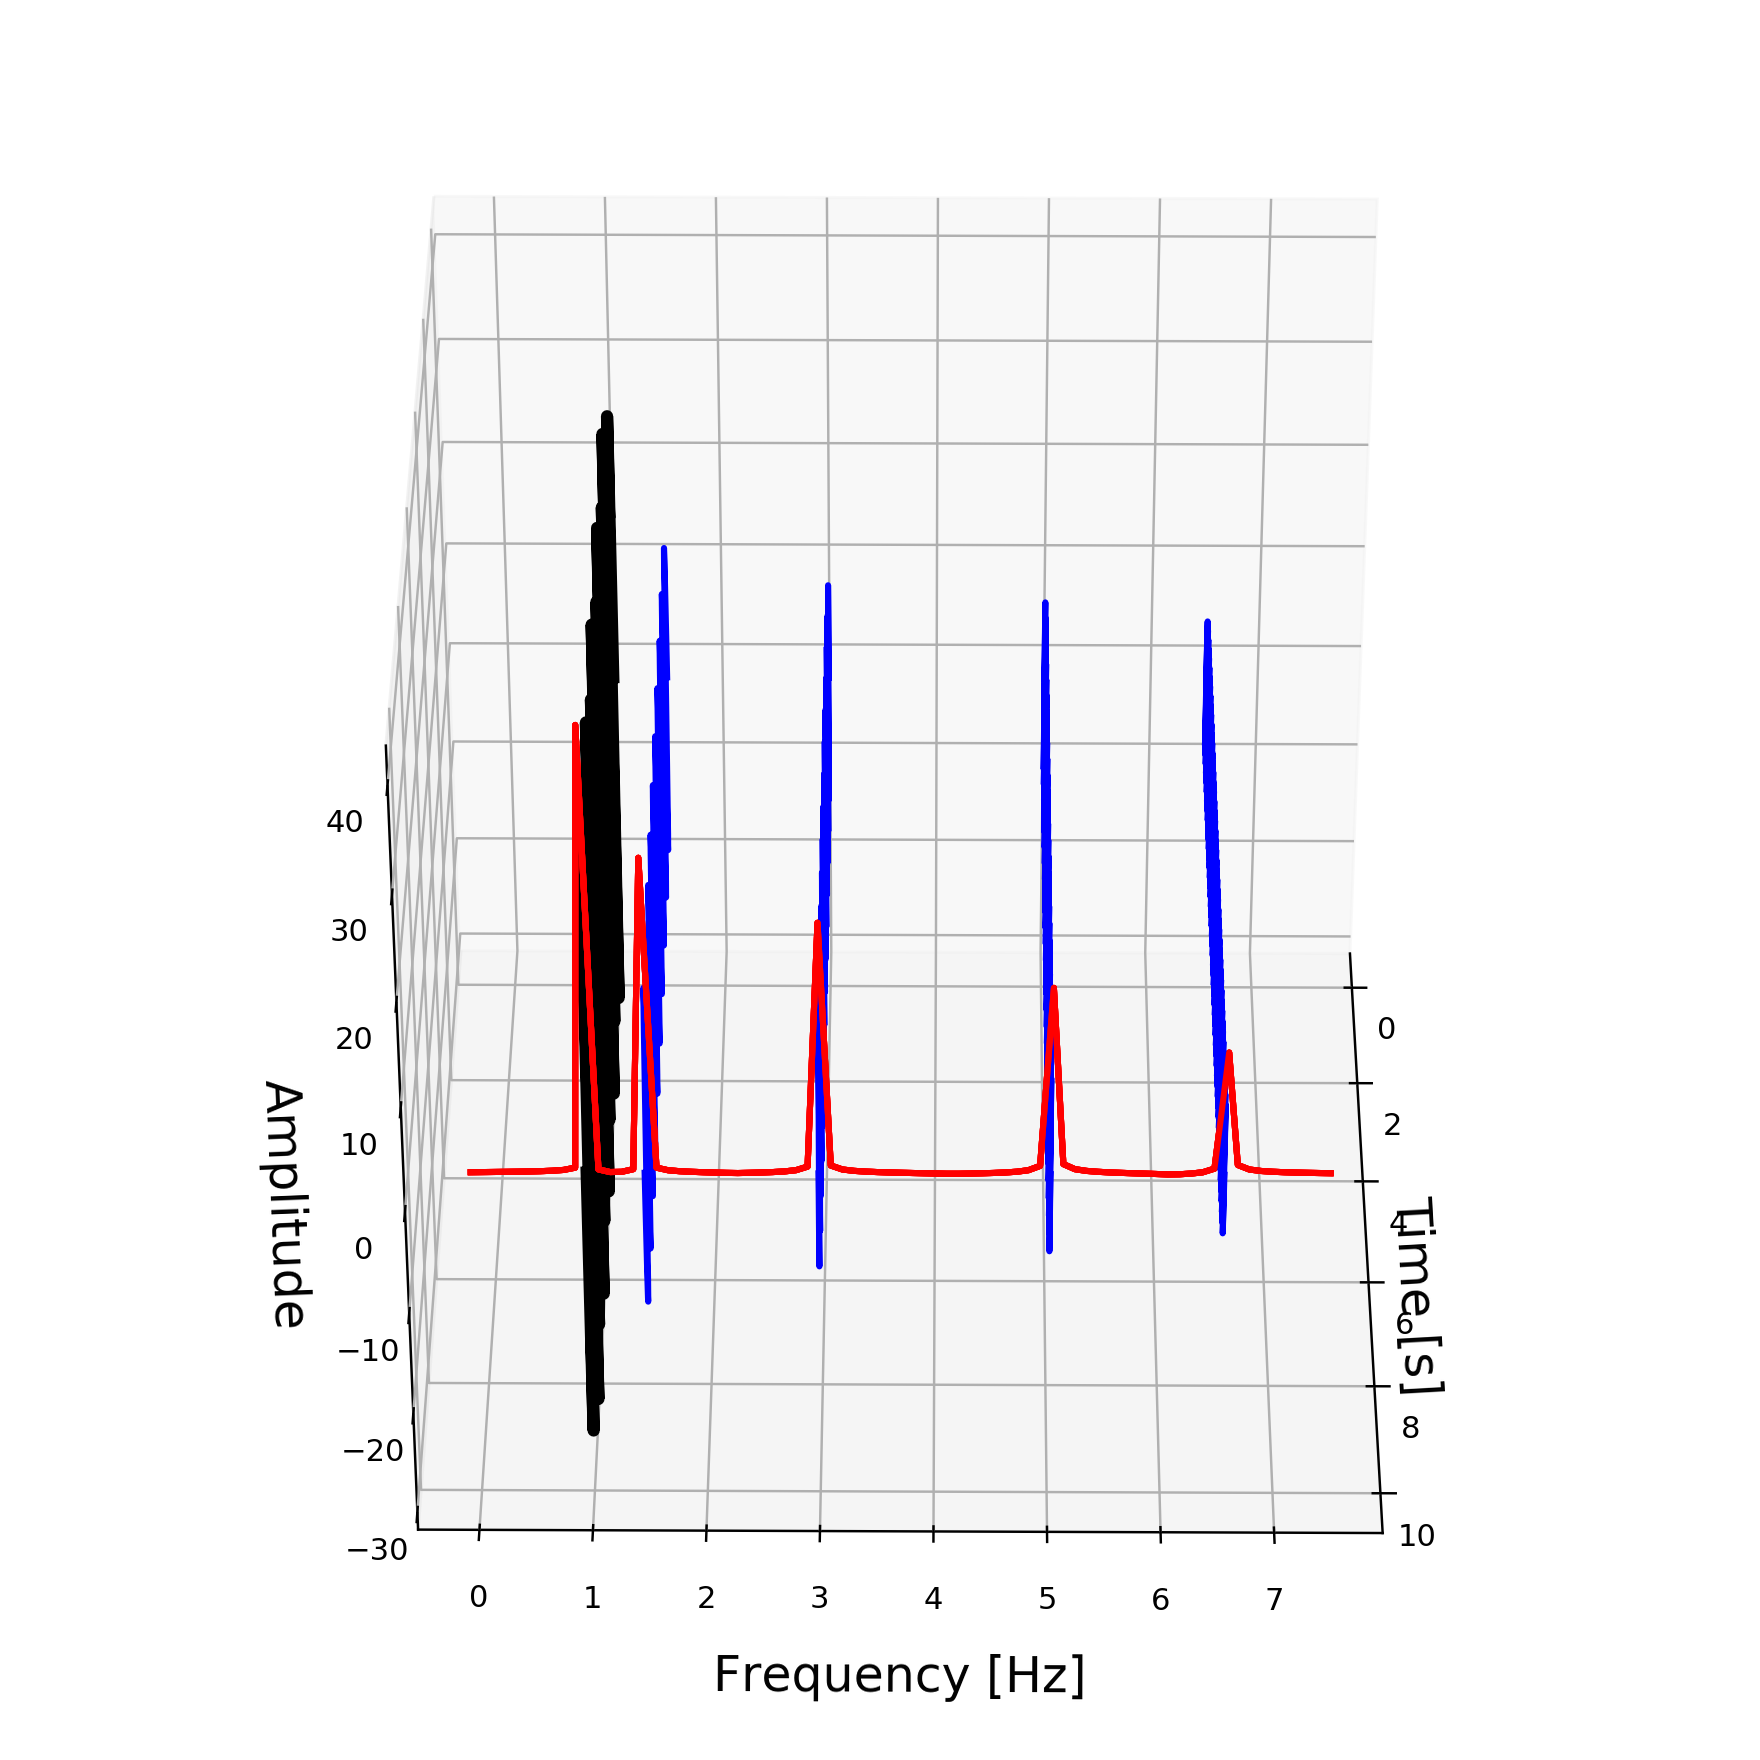

In [2]:
import sys
sys.path.append(
    "/Users/dmitrys/Desktop/DataProjects/otus-advanced-ml/Materials/13-ts-feature-extraction/"
)
from mpl_toolkits.mplot3d import Axes3D
from src.utils import *
from src.signal_processing import *
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [
    amplitudes[ii]*np.sin(
        2*np.pi*frequencies[ii]*x_value
    ) for ii in range(0,len(amplitudes))
]
composite_y_value = np.sum(y_values, axis=0)
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)
 
y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]
 
for ii in range(0,len(y_values_)):
    try:
        signal = y_values_[ii]
        color = colors[ii]
        length = signal.shape[0]
        x=np.linspace(0,10,1000)
        y=np.array([frequencies[ii]]*length)
        z=signal

        if ii == 0:
            linewidth = 4
        else:
            linewidth = 2
        ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

        x=[10]*75
        y=f_values[:75]
        z = fft_values[:75]*3
        ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')

        plt.tight_layout()
    except:
        continue
plt.show()

In [3]:
%matplotlib inline

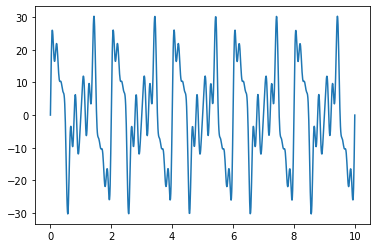

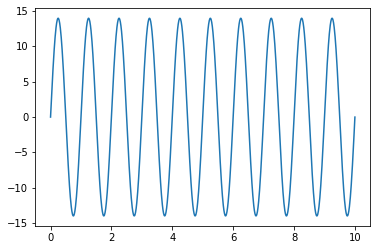

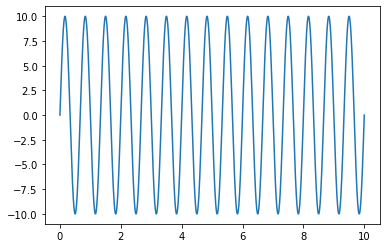

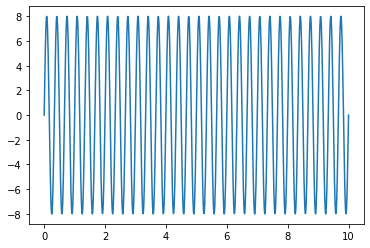

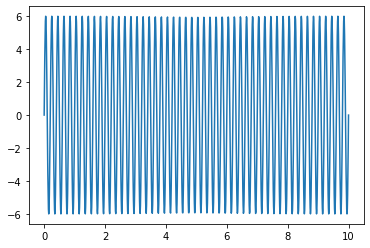

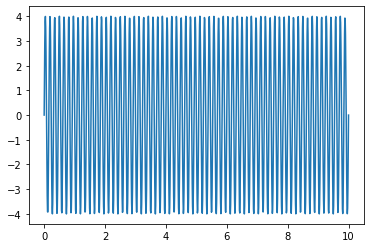

In [4]:
for y in y_values_:
    plt.plot(x_value, y)
    plt.show()